# AB Testing

This is data from Kaggle which is about  popular mobile puzzle game Cookie Cats.\
Data description and Test process notes are from Kaggle notebook

## AB Testing Process

1. Understanding business problem & data
2. Detect and resolve problems in the data (Missing Value, Outliers, Unexpected Value)
3. Look summary stats and plots
4. Apply hypothesis testing and check assumptions
    - Check Normality & Homogeneity
    - Apply tests (Shapiro, Levene Test, T-Test, Welch Test, Mann Whitney U Test)
5. Evaluate the results
6. Make inferences 
7. Recommend business decision to your customer/director/ceo etc. 

## Data description
**The data is from *90,189 players* that installed the game while the AB-test was running.**

The variables are:

* userid - a unique number that identifies each player.
* version- whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).
* sum_gamerounds - the number of game rounds played by the player during the first week after installation
* retention_1 - did the player come back and play 1 day after installing?
* retention_7 - did the player come back and play 7 days after installing?

When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

## Get Jupyter Ready

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

## Read Data

In [3]:
df=pd.read_csv('data/cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## EDA

### Missing values

In [4]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

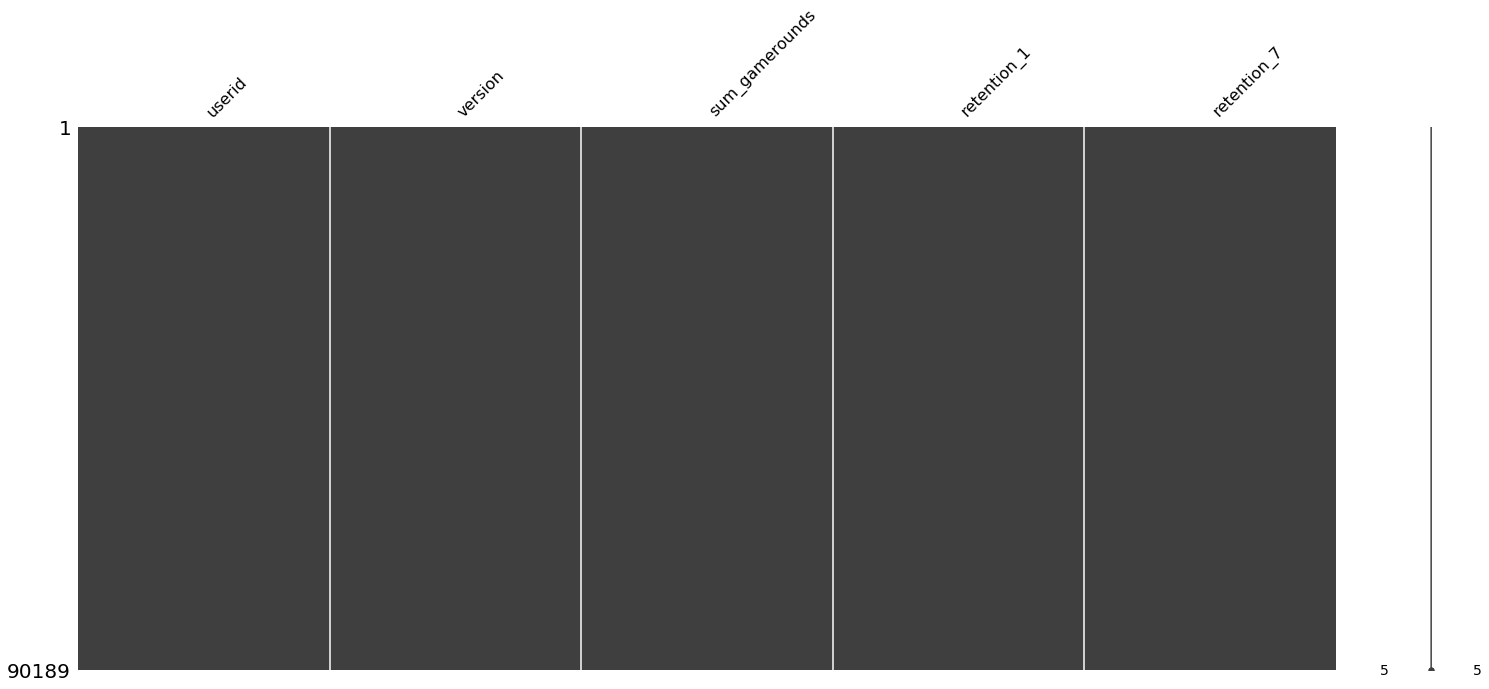

In [5]:
import missingno as mn
mn.matrix(df)

### Summury statistics

In [6]:
# check number of unique user ID
len(df.userid.unique())==df.shape[0]

True

In [7]:
df.describe()['sum_gamerounds']

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [8]:
df.groupby('version').sum_gamerounds.describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
gate_30,44700.0,52.456264,256.716423,0.0,5.0,17.0,50.0,49854.0
gate_40,45489.0,51.298776,103.294416,0.0,5.0,16.0,52.0,2640.0


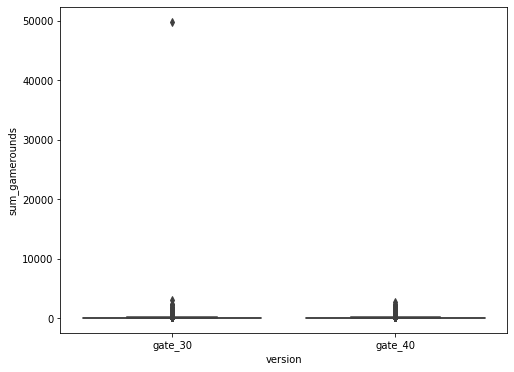

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df.version,y=df.sum_gamerounds,data=df)
plt.show()

In [10]:
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.0,51.872457,195.050858,0.0,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,49854.0


In [11]:
# # calculate summary statistics
# gameround_mean,gameround_std= np.mean(df.sum_gamerounds),np.std(df.sum_gamerounds)
# # identify outliers
# cut_off = gameround_std * 3
# lower, upper = gameround_mean - cut_off, gameround_mean + cut_off
# outliers = [x for x in df.sum_gamerounds if x < lower or x > upper]
# print('Identified outliers: %d' % len(outliers))


In [12]:
df=df[df.sum_gamerounds < df.sum_gamerounds.max()]
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90188.0,51.320253,102.682719,0.0,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,2961.0


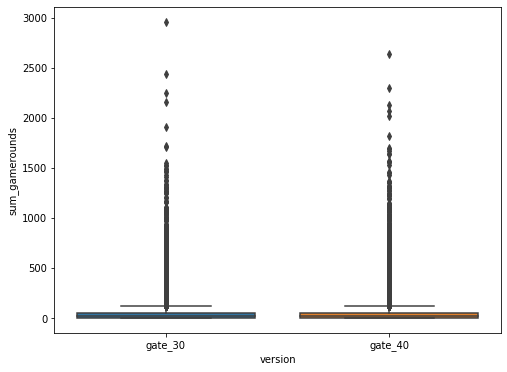

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df.version,y=df.sum_gamerounds,data=df)
plt.show()

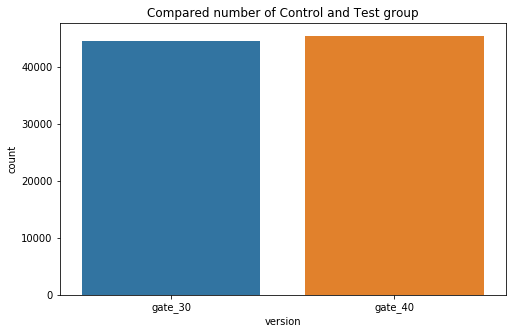

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='version',data=df)
plt.title('Compared number of Control and Test group')
plt.show()